# **Logistic regression on imbalanced dataset**

In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier

* Let's create a datasets of varying class sizes to introduce class imbalance in the data.
* D1 ->(2%, 98%)<br/> D2 ->(20%, 80%)<br/> D3 ->(40%, 60%)<br/> D4 ->(50%, 50%)  

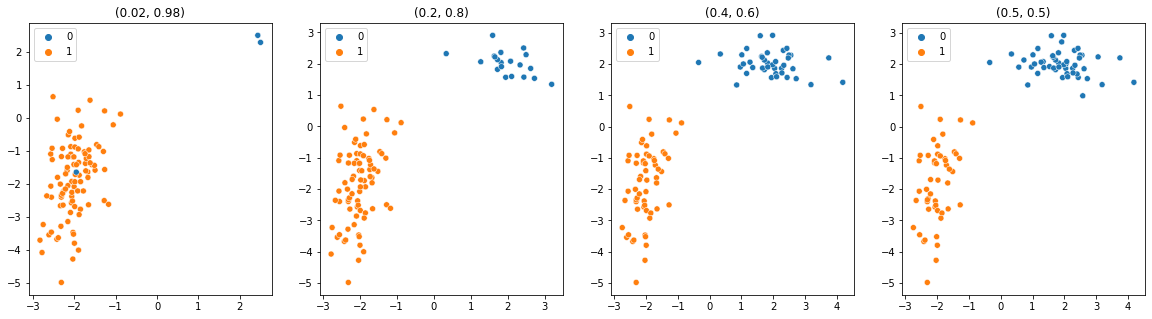

In [70]:
class_weights = [(0.02,0.98), (0.2,0.8), (0.4,0.6), (0.5,0.5)]
data_sets = []

plt.figure(figsize=(20,5))
for i in range(len(class_weights)):
  X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, 
                            weights=class_weights[i], class_sep=2, random_state=49)

  data_sets.append((X, y))
  plt.subplot(1, 4, i+1)
  plt.title(f"{class_weights[i]}")
  sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

In [50]:
def draw_line(coef,intercept, mi, ma):
  points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
  return points[:,0], points[:,1]

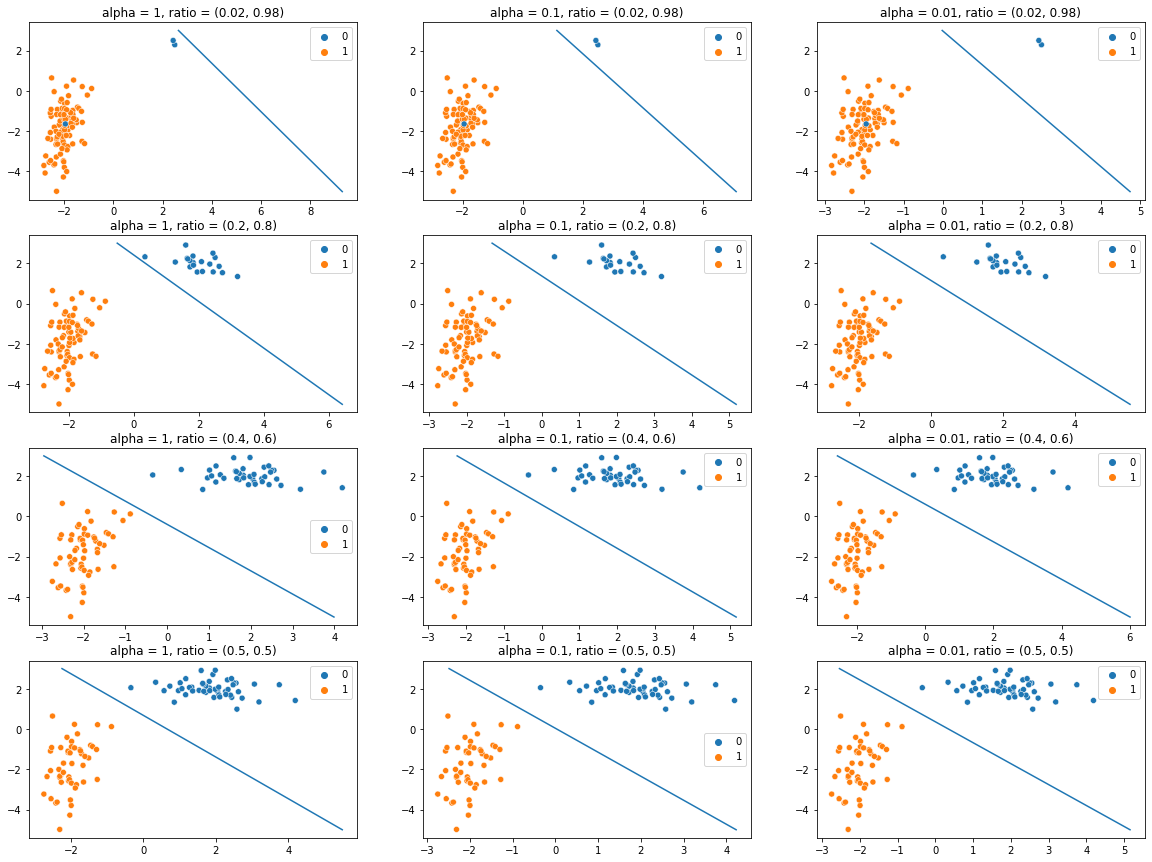

In [67]:
plt_num = 1
alphas = [1, 0.1, 0.01]
plt.figure(figsize=(20,15))
for index,data_set in enumerate(data_sets):
  X = data_set[0]; y = data_set[1]
  for alpha in alphas:
    plt.subplot(4, 3, plt_num)
    clf = SGDClassifier(loss='log', alpha=alpha)
    clf.fit(X,y)

    line_x, line_y = draw_line(clf.coef_[0], clf.intercept_[0],-5,3)
    plt.title(f"alpha = {alpha}, ratio = {class_weights[index]}")
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
    sns.lineplot(x=line_x, y=line_y)
    plt_num+=1
plt.show()

* Here **alpha is the regularization parameter** in logistic regression which is multiplied to regularization term in optimization function.
* For the **large value of alpha**, the model is highly biased model. Model is underfitting especially for the **highly imbalanced** data set
* Looking at the first plot(top-left), if the alpha is set to large and highly imbalanced data, Model is biased model.
* Looking at the last plot(bottom-right), if the **alpha is small** and  optimal and, if the **data is balanced**, the model has the better decision surface.